In [ ]:
# Selena Buzinky

In [24]:
%matplotlib inline

In [158]:
%matplotlib inline
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from dmba import regressionSummary, exhaustive_search, liftChart, gainsChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from dmba import classificationSummary
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


In [8]:
# Dataset 1: Gym Members Exercise Tracking

df = pd.read_csv('gym_members_exercise_tracking.csv')

In [10]:
df.head()

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_per_week,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39


In [12]:
# Check for null values 

df.isnull().sum().sort_values(ascending=False).head(10)

Age                       0
Gender                    0
Weight_kg                 0
Height_m                  0
Max_BPM                   0
Avg_BPM                   0
Resting_BPM               0
Session_Duration_hours    0
Calories_Burned           0
Workout_Type              0
dtype: int64

In [60]:
# Select numerical predictors - remove Session_Duration_hours

num_predictors = [
    "Age",
    "Weight_kg",
    "Height_m",
    "Max_BPM",
    "Avg_BPM",
    "Resting_BPM",
    "Fat_Percentage",
    "Water_Intake_liters",
    "Workout_Frequency_days_per_week",
    "Experience_Level",
    "BMI"
]

outcome = "Calories_Burned"

In [62]:
X = df[num_predictors]
y = df[outcome]

In [64]:
combined_df = pd.concat([X, y], axis=1)

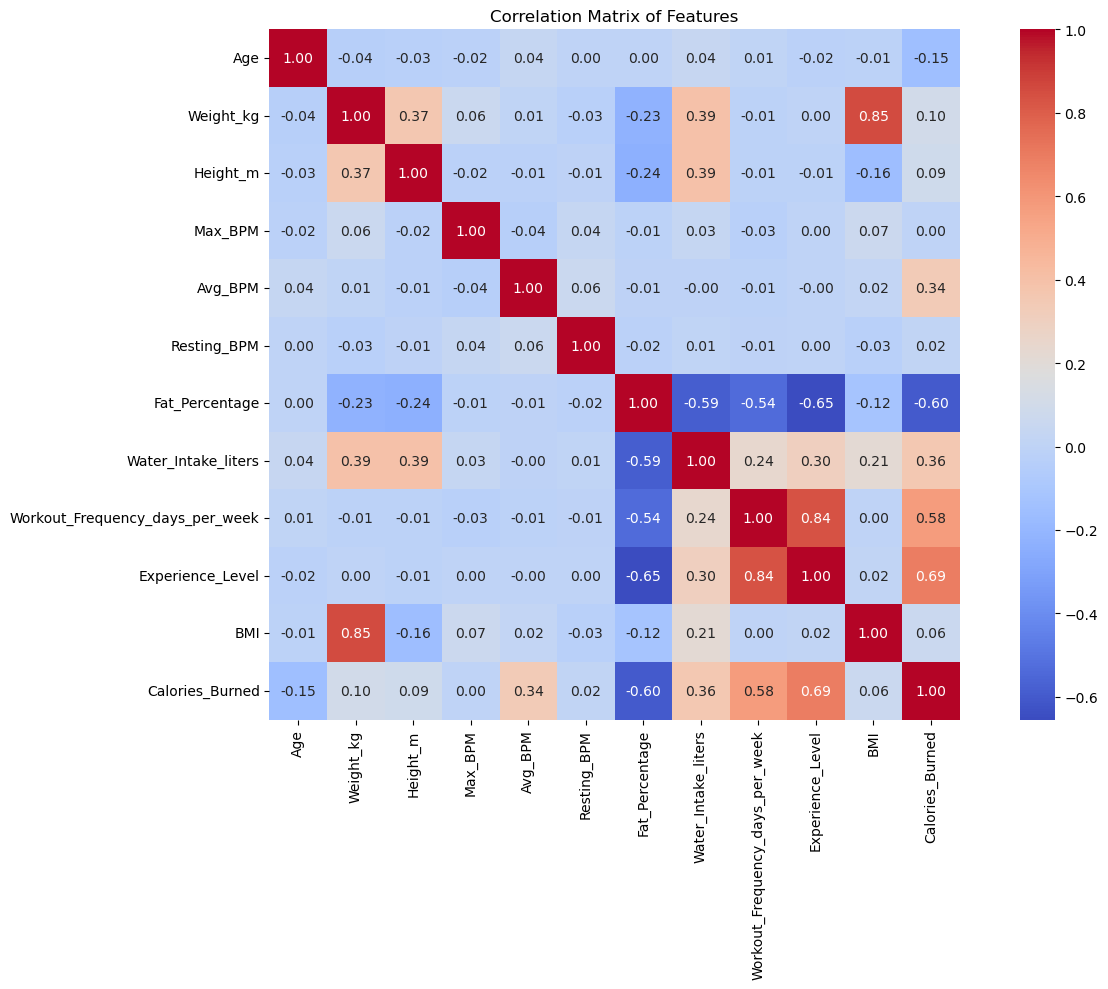

In [66]:
# Correlation Matrix

numerical_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(14, 10))
corr_matrix = combined_df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [78]:
# Select predictors - remove Session_Duration_hours

predictors = [
    "Age",
    "Gender",
    "Weight_kg",
    "Height_m",
    "Max_BPM",
    "Avg_BPM",
    "Resting_BPM",
    "Workout_Type",
    "Fat_Percentage",
    "Water_Intake_liters",
    "Workout_Frequency_days_per_week",
    "Experience_Level",
    "BMI"
]

outcome = "Calories_Burned"

In [80]:
# Create dummy variables for categorical columns 

X = pd.get_dummies(df[predictors], drop_first=True, dtype=int)
y = df[outcome]

In [82]:
X.columns.tolist()

['Age',
 'Weight_kg',
 'Height_m',
 'Max_BPM',
 'Avg_BPM',
 'Resting_BPM',
 'Fat_Percentage',
 'Water_Intake_liters',
 'Workout_Frequency_days_per_week',
 'Experience_Level',
 'BMI',
 'Gender_Male',
 'Workout_Type_HIIT',
 'Workout_Type_Strength',
 'Workout_Type_Yoga']

In [84]:
# split into training and validation

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_valid.shape, y_valid.shape)

Training set: (583, 15) (583,)
Validation set: (390, 15) (390,)


In [74]:
# Train a Multiple Linear Regression model

df_mlr = LinearRegression()
df_mlr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [86]:
# Print coefficients

print('intercept ', df_mlr.intercept_)
print(pd.DataFrame({'Predictor': X_train.columns, 'coefficient': df_mlr.coef_}))

intercept  -310.30444138976964
                          Predictor  coefficient
0                               Age    -3.565539
1                         Weight_kg     0.399263
2                          Height_m    28.276786
3                           Max_BPM     0.083474
4                           Avg_BPM     6.583892
5                       Resting_BPM    -0.235657
6                    Fat_Percentage    -6.943042
7               Water_Intake_liters    32.109737
8   Workout_Frequency_days_per_week    16.334381
9                  Experience_Level   197.419351
10                              BMI    -0.880191
11                      Gender_Male    19.315890
12                Workout_Type_HIIT    41.716954
13            Workout_Type_Strength    30.076774
14                Workout_Type_Yoga    18.135953


In [90]:
df_mlr_pred = df_mlr.predict(X_valid)

In [94]:
# Compute accuracy measures

regressionSummary(y_valid, df_mlr_pred)


Regression statistics

                      Mean Error (ME) : -10.0961
       Root Mean Squared Error (RMSE) : 160.0507
            Mean Absolute Error (MAE) : 131.2885
          Mean Percentage Error (MPE) : -5.0759
Mean Absolute Percentage Error (MAPE) : 17.0161


In [96]:
print(f'R² Score: {r2_score(y_valid, df_mlr_pred):.4f}')

R² Score: 0.6163


In [254]:
# Train Single Tree: Decision Tree Regressor

defaultTree = DecisionTreeRegressor(criterion="squared_error", random_state=1)
defaultTree.fit(X_train, y_train)

y_pred = defaultTree.predict(X_valid)

# Summary
print("Validation RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred)))
print("Validation R² Score:", r2_score(y_valid, y_pred))

Validation RMSE: 0.46635203531033365
Validation R² Score: -0.17737394533118733


In [58]:
# Train Bagging Regressor

defaultTree = DecisionTreeRegressor(criterion="squared_error", random_state=1)

bagging = BaggingRegressor(estimator=defaultTree, random_state=1)

# Parameter grid
param_grid = {
    'n_estimators': [50],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'estimator__max_depth': [10, None],
    'estimator__min_samples_split': [2, 5]
}

# Grid search
grid = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_valid)

print("Best Parameters:", grid.best_params_)
print("Validation RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred)))
print("Validation R²:", r2_score(y_valid, y_pred))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'estimator__max_depth': None, 'estimator__min_samples_split': 5, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
Validation RMSE: 166.65286761861057
Validation R²: 0.5839563391802529


In [68]:
defaultTree = DecisionTreeRegressor(
    max_depth=None,
    min_samples_split=5,
    random_state=1
)

bagging = BaggingRegressor(
    estimator=defaultTree,
    n_estimators=50,
    max_samples=1.0,
    max_features=1.0,
    random_state=1
)

In [70]:
bagging.fit(X_train, y_train) 

,estimator,DecisionTreeR...andom_state=1)
,n_estimators,50
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,1
,verbose,0


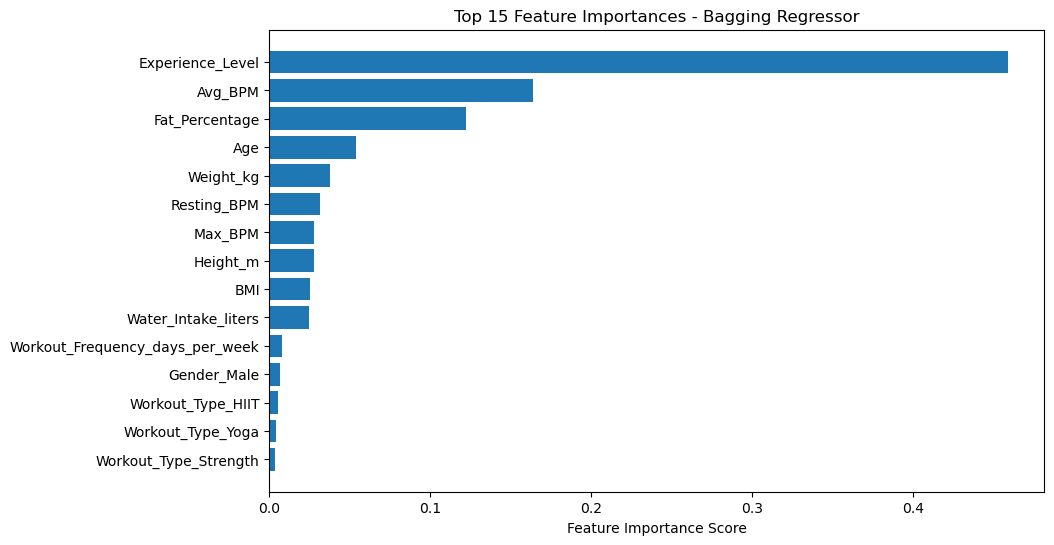

In [72]:
# Feature Importances for Bagging Regressor

top_n = 15
importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
feature_names = X_train.columns
indices = np.argsort(importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[indices][::-1], importances[indices][::-1])
plt.xlabel("Feature Importance Score")
plt.title("Top 15 Feature Importances - Bagging Regressor")
plt.show()

In [100]:
# Train Random Forest Regressor

rf = RandomForestRegressor(random_state=1)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'max_features': [0.7]
}

rf_gridsearch = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

rf_gridsearch.fit(X_train, y_train)

best_model = rf_gridsearch.best_estimator_

# Predicting and evaluating on the validation set
y_valid_pred = best_model.predict(X_valid)
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
valid_r2 = r2_score(y_valid, y_valid_pred)

print("Best Parameters:", rf_gridsearch.best_params_)
print("Validation RMSE:", valid_rmse)
print("Validation R²:", valid_r2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'max_depth': 20, 'max_features': 0.7, 'min_samples_split': 5, 'n_estimators': 100}
Validation RMSE: 164.6393400121274
Validation R²: 0.5939490227773767


In [102]:
rf = RandomForestRegressor(random_state=1,
                          n_estimators=100,
                          max_depth=20,
                          min_samples_split=5,
                          max_features=0.7)

In [104]:
rf.fit(X_train, y_train) 

,n_estimators,100
,criterion,'squared_error'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


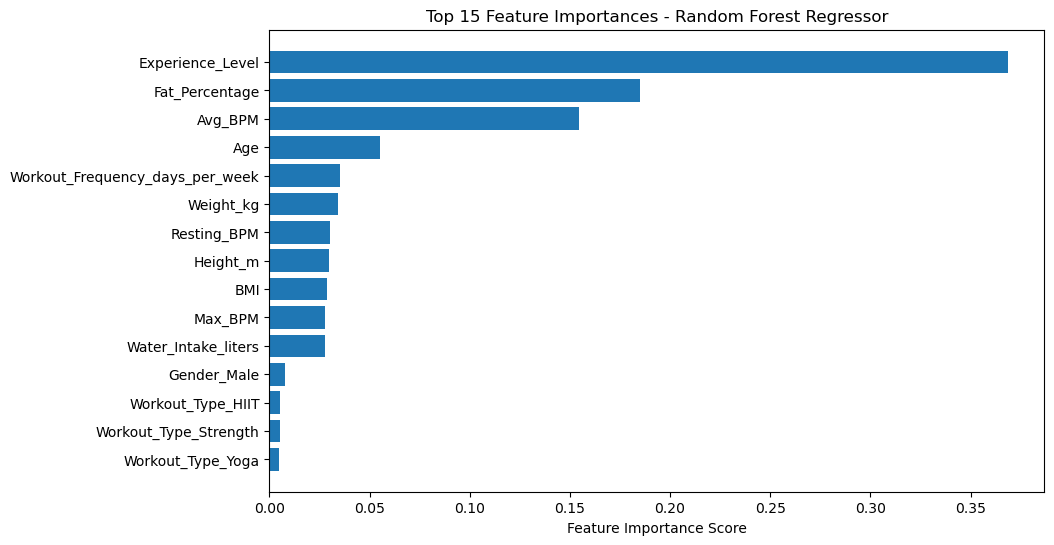

In [106]:
# Feature Importances for Random Forest Regressor

top_n = 15
importances = rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[indices][::-1], importances[indices][::-1])
plt.xlabel("Feature Importance Score")
plt.title("Top 15 Feature Importances - Random Forest Regressor")
plt.show()

In [108]:
# Train XGBoost Regressor 

xgb = XGBRegressor(random_state=1, eval_metric='rmse')

# Defining hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [4, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Evaluating best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

print("Best Parameters:", grid_search.best_params_)
print("Validation RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred)))
print("Validation R²:", r2_score(y_valid, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 1.0}
Validation RMSE: 163.68872899500442
Validation R²: 0.5986244678497314


In [112]:
xgb = XGBRegressor(random_state=1, 
                   eval_metric='rmse',
                   n_estimators=50,
                   learning_rate=0.1,
                   max_depth=4,
                   subsample=1.0,
                   colsample_bytree=0.8)

In [114]:
xgb.fit(X_train, y_train) 

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'rmse'


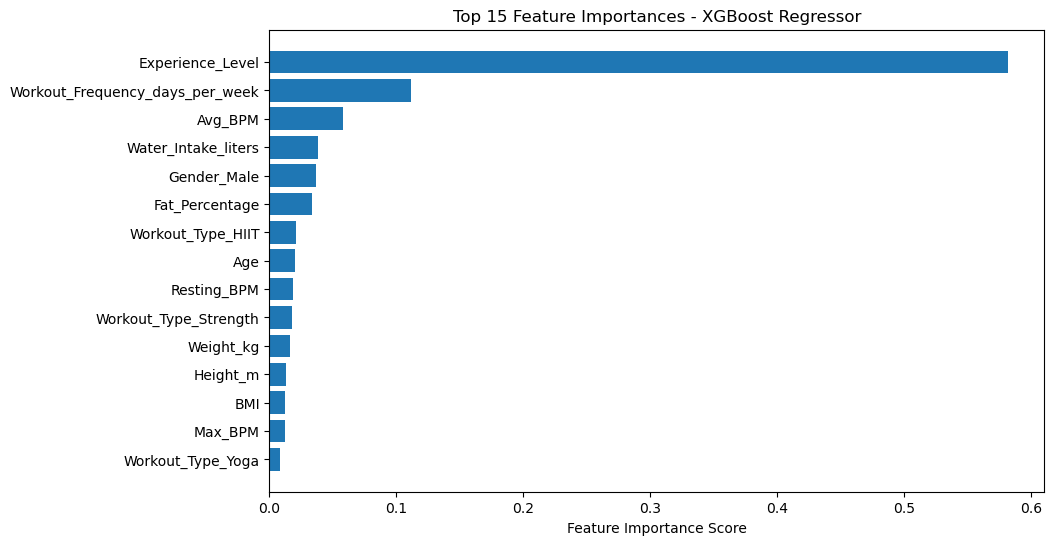

In [116]:
# Feature Importances for XGBoost Regressor

top_n = 15
importances = xgb.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[indices][::-1], importances[indices][::-1])
plt.xlabel("Feature Importance Score")
plt.title("Top 15 Feature Importances - XGBoost Regressor")
plt.show()

In [118]:
# Dataset 2: Income

df2 = pd.read_csv('income.csv')

In [120]:
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [124]:
# Check for null values 

df2.isnull().sum().sort_values(ascending=False).head(10)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
dtype: int64

In [126]:
# Change Income to values 1 and 0

df2['Income_binary'] = np.where(df2['income'] == '>50K', 1, 0)

In [136]:
df2['Income_binary'].unique()

array([1, 0])

In [148]:
# Select predictors

predictors = [
    "age",
    "workclass",
    "education_num",
    "race",
    "sex",
    "hours_per_week"
]

outcome = "Income_binary"

In [150]:
# Create dummy variables for categorical columns 

X = pd.get_dummies(df2[predictors], drop_first=True, dtype=int)
y = df2[outcome]

In [152]:
X.columns.tolist()

['age',
 'education_num',
 'hours_per_week',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'sex_Male']

In [154]:
# split into training and validation

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_valid.shape, y_valid.shape)

Training set: (15000, 16) (15000,)
Validation set: (10000, 16) (10000,)


In [162]:
# Train a Logistic Regression model

# Standardize features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [167]:
logit = LogisticRegression(penalty="l2", C=1e42, solver='liblinear', tol=1e-28)
logit.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,1e-28
,C,1e+42
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [173]:
# Print coefficients 

print('intercept ', logit.intercept_)
print(pd.DataFrame({
    'Predictor': X_train.columns,
    'Coefficient': logit.coef_[0]
}))

intercept  [-1.63706744]
                     Predictor  Coefficient
0                          age     0.641437
1                education_num     0.946835
2               hours_per_week     0.418171
3        workclass_Federal-gov     0.207099
4          workclass_Local-gov     0.149988
5       workclass_Never-worked    -0.245494
6            workclass_Private     0.346458
7       workclass_Self-emp-inc     0.250292
8   workclass_Self-emp-not-inc     0.059689
9          workclass_State-gov     0.116270
10       workclass_Without-pay    -0.434194
11     race_Asian-Pac-Islander     0.024273
12                  race_Black     0.051431
13                  race_Other     0.000389
14                  race_White     0.190109
15                    sex_Male     0.542161


In [179]:
# Print confusion matrix and accuracy

classificationSummary(y_valid, logit.predict(X_valid_scaled))

Confusion Matrix (Accuracy 0.8026)

       Prediction
Actual    0    1
     0 7087  468
     1 1506  939


In [181]:
# Print classification report

print(classification_report(y_valid, logit.predict(X_valid_scaled)))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      7555
           1       0.67      0.38      0.49      2445

    accuracy                           0.80     10000
   macro avg       0.75      0.66      0.68     10000
weighted avg       0.79      0.80      0.78     10000



In [183]:
# Train Single Tree: Decision Tree Classifier

defaultTree = DecisionTreeClassifier(criterion="entropy", random_state=1)
defaultTree.fit(X_train, y_train)
classes = defaultTree.classes_
classificationSummary(y_valid, defaultTree.predict(X_valid), class_names=defaultTree.classes_)

Confusion Matrix (Accuracy 0.7565)

       Prediction
Actual    0    1
     0 6574  981
     1 1454  991


In [185]:
print(classification_report(y_valid, defaultTree.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      7555
           1       0.50      0.41      0.45      2445

    accuracy                           0.76     10000
   macro avg       0.66      0.64      0.65     10000
weighted avg       0.74      0.76      0.75     10000



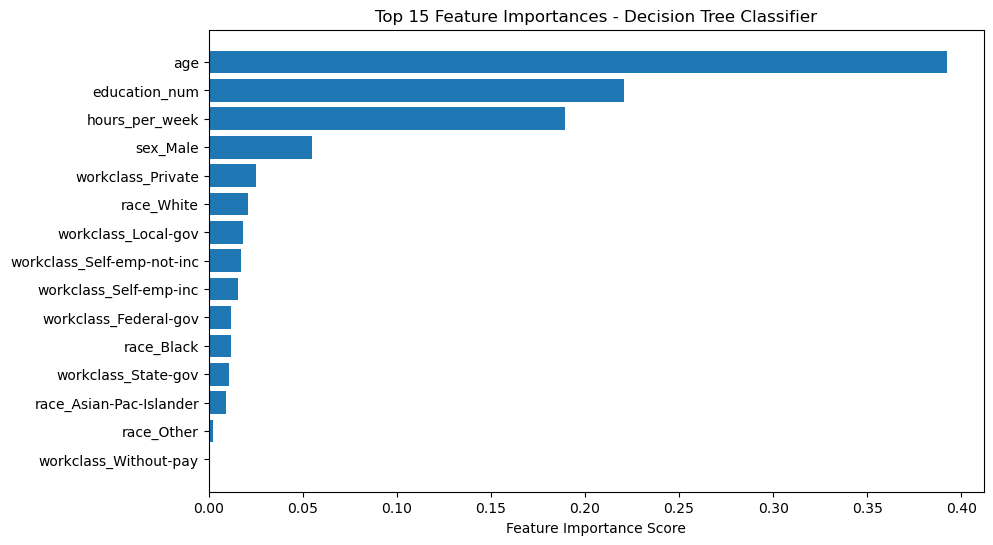

In [187]:
# Feature Importances

top_n = 15
importances = defaultTree.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[indices][::-1], importances[indices][::-1])
plt.xlabel("Feature Importance Score")
plt.title("Top 15 Feature Importances - Decision Tree Classifier")
plt.show()

In [205]:
# Train Bagging Classifier

defaultTree = DecisionTreeClassifier(criterion="entropy", random_state=1)

bagging = BaggingClassifier(estimator=defaultTree, random_state=1)

# Parameter grid
param_grid = {
    'n_estimators': [50],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'estimator__max_depth': [10, None],
    'estimator__min_samples_split': [2, 5]
}

# Grid search
grid = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_valid)

print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'estimator__max_depth': 10, 'estimator__min_samples_split': 2, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}


In [207]:
defaultTree = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=2,
    random_state=1
)

bagging = BaggingClassifier(
    estimator=defaultTree,
    n_estimators=50,
    max_samples=0.5,
    max_features=1.0,
    random_state=1
)

In [209]:
bagging.fit(X_train, y_train) 

,estimator,DecisionTreeC...andom_state=1)
,n_estimators,50
,max_samples,0.5
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,1
,verbose,0


In [211]:
classificationSummary(y_valid, bagging.predict(X_valid))

Confusion Matrix (Accuracy 0.8053)

       Prediction
Actual    0    1
     0 7038  517
     1 1430 1015


In [213]:
print(classification_report(y_valid, bagging.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7555
           1       0.66      0.42      0.51      2445

    accuracy                           0.81     10000
   macro avg       0.75      0.67      0.69     10000
weighted avg       0.79      0.81      0.79     10000



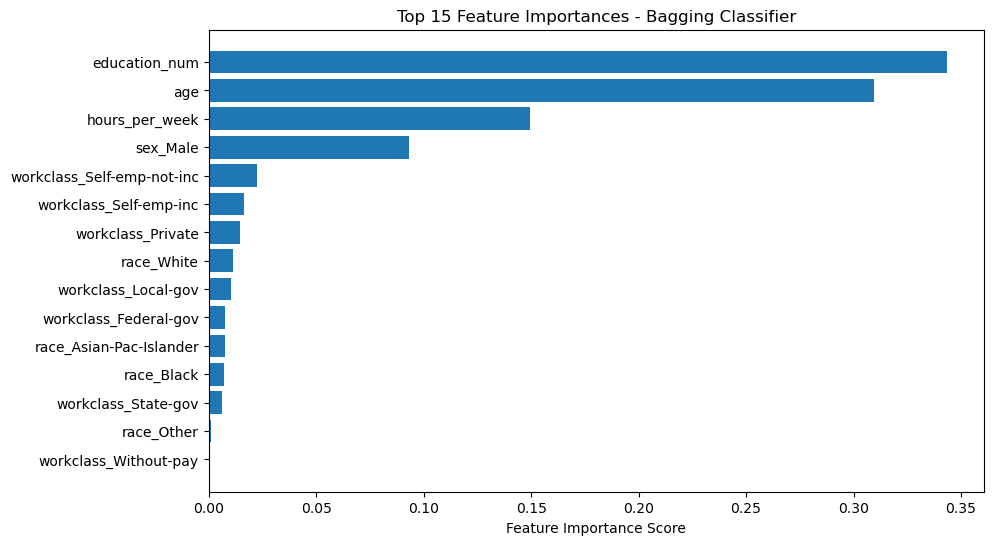

In [215]:
# Feature Importances

top_n = 15
importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
feature_names = X_train.columns
indices = np.argsort(importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[indices][::-1], importances[indices][::-1])
plt.xlabel("Feature Importance Score")
plt.title("Top 15 Feature Importances - Bagging Classifier")
plt.show()

In [218]:
# Train Random Forest Classifier

rf = RandomForestClassifier(random_state=1)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'max_features': [0.5, 0.7]
}

rf_gridsearch = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

rf_gridsearch.fit(X_train, y_train)
y_pred = rf_gridsearch.best_estimator_.predict(X_valid)

print("Best Parameters:", rf_gridsearch.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': 10, 'max_features': 0.7, 'min_samples_split': 2, 'n_estimators': 100}


In [220]:
rf = RandomForestClassifier(random_state=1,
                          n_estimators=100,
                          max_depth=10,
                          min_samples_split=2,
                          max_features=0.7)

In [222]:
rf.fit(X_train, y_train) 

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [224]:
classificationSummary(y_valid, rf.predict(X_valid))

Confusion Matrix (Accuracy 0.8062)

       Prediction
Actual    0    1
     0 7030  525
     1 1413 1032


In [226]:
print(classification_report(y_valid, rf.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7555
           1       0.66      0.42      0.52      2445

    accuracy                           0.81     10000
   macro avg       0.75      0.68      0.70     10000
weighted avg       0.79      0.81      0.79     10000



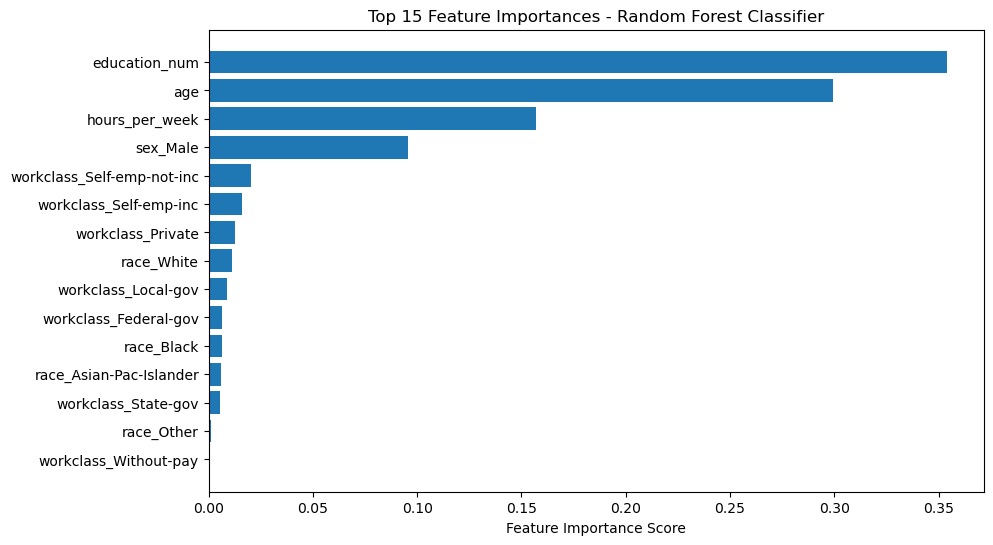

In [228]:
# Feature Importances for Random Forest Classifier

top_n = 15
importances = rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[indices][::-1], importances[indices][::-1])
plt.xlabel("Feature Importance Score")
plt.title("Top 15 Feature Importances - Random Forest Classifier")
plt.show()

In [230]:
# Train XGBoost Classifier

xgb = XGBClassifier(random_state=1)

# Defining hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [4, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=3,
                           scoring='f1',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_valid)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


In [232]:
xgb = XGBClassifier(random_state=1, 
                   n_estimators=200,
                   learning_rate=0.2,
                   max_depth=4,
                   subsample=0.8,
                   colsample_bytree=1.0)

In [234]:
xgb.fit(X_train, y_train) 

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [236]:
classificationSummary(y_valid, xgb.predict(X_valid))

Confusion Matrix (Accuracy 0.8032)

       Prediction
Actual    0    1
     0 7004  551
     1 1417 1028


In [238]:
print(classification_report(y_valid, xgb.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7555
           1       0.65      0.42      0.51      2445

    accuracy                           0.80     10000
   macro avg       0.74      0.67      0.69     10000
weighted avg       0.79      0.80      0.79     10000



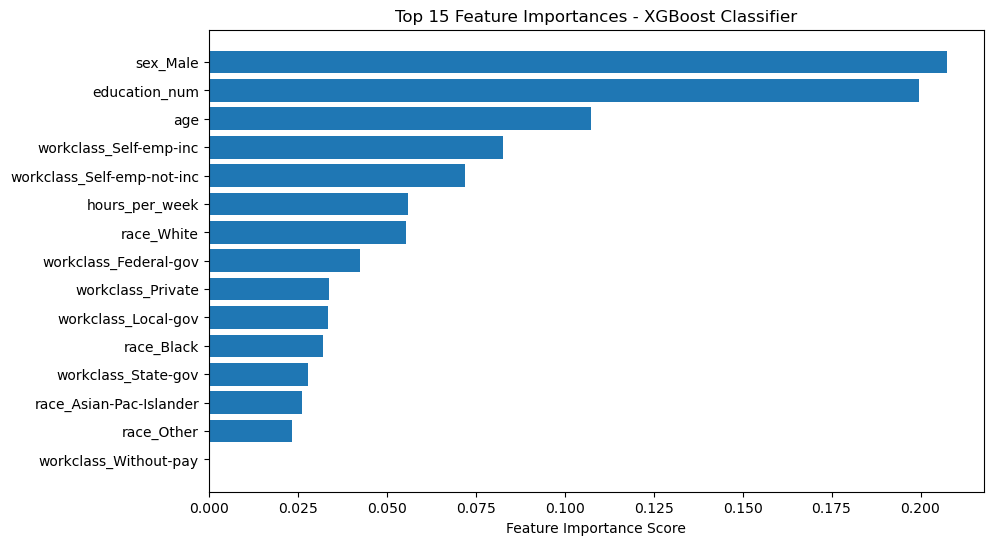

In [240]:
# Feature Importances for XGBoost Classifier

top_n = 15
importances = xgb.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[indices][::-1], importances[indices][::-1])
plt.xlabel("Feature Importance Score")
plt.title("Top 15 Feature Importances - XGBoost Classifier")
plt.show()

In [ ]:
# Metrics to calculate the Correlation between different fields 

In [244]:
# Create age_bucket column

df['age_bucket'] = pd.cut(
    df['Age'],
    bins=[18, 25, 35, 50, 120],
    labels=['18–25', '26–35', '36–50', '50+'],
    right=True,
    include_lowest=True
)

# Quick check
print(df[['Age', 'age_bucket']].head())

   Age age_bucket
0   56        50+
1   46      36–50
2   32      26–35
3   25      18–25
4   38      36–50


In [250]:
# Correlation between Calories and BMI

corr_by_group = (
    df.groupby(['age_bucket', 'Gender'])
      .apply(lambda g: g['BMI'].corr(g['Calories_Burned']))
      .reset_index(name='corr_BMI_Calories')
)

print(corr_by_group)

  age_bucket  Gender  corr_BMI_Calories
0      18–25  Female           0.155111
1      18–25    Male           0.043814
2      26–35  Female           0.036323
3      26–35    Male           0.063294
4      36–50  Female          -0.030290
5      36–50    Male          -0.018215
6        50+  Female          -0.105039
7        50+    Male           0.014171


/var/folders/lx/jy0c8gx56b7_9vjv7gxml3n80000gn/T/ipykernel_34413/3057992338.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_bucket', 'Gender'])
/var/folders/lx/jy0c8gx56b7_9vjv7gxml3n80000gn/T/ipykernel_34413/3057992338.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g['BMI'].corr(g['Calories_Burned']))


In [252]:
# Correlation between Calories and Fat Percentage

corr_by_group2 = (
    df.groupby(['age_bucket', 'Gender'])
      .apply(lambda g: g['Fat_Percentage'].corr(g['Calories_Burned']))
      .reset_index(name='corr_fat_pct_Calories')
)

print(corr_by_group2)

  age_bucket  Gender  corr_fat_pct_Calories
0      18–25  Female              -0.531478
1      18–25    Male              -0.632553
2      26–35  Female              -0.713204
3      26–35    Male              -0.587073
4      36–50  Female              -0.584739
5      36–50    Male              -0.661897
6        50+  Female              -0.483384
7        50+    Male              -0.545659


/var/folders/lx/jy0c8gx56b7_9vjv7gxml3n80000gn/T/ipykernel_34413/3171912993.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_bucket', 'Gender'])
/var/folders/lx/jy0c8gx56b7_9vjv7gxml3n80000gn/T/ipykernel_34413/3171912993.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g['Fat_Percentage'].corr(g['Calories_Burned']))
